In [78]:
import tensorflow as tf
from tensorflow import keras

In [79]:
print(tf.__version__)
print(keras.__version__)

2.19.0
3.10.0


In [80]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [81]:
X_train_full.shape

(60000, 28, 28)

In [82]:
 X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
 y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [83]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [84]:
class_names[y_train[0]]

'Coat'

In [85]:

hidden0 = keras.layers.Flatten(input_shape=[28, 28])
hidden1 = keras.layers.Dense(300, activation="relu")
hidden2 = keras.layers.Dense(100, activation="relu")
hidden3 = keras.layers.Dense(10, activation="softmax")

model = keras.models.Sequential([
    hidden0,
    hidden1,
    hidden2,
    hidden3
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [88]:
model.layers[1].name

'dense_12'

In [89]:
weights, biases = hidden1.get_weights()
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [90]:
 model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [91]:
 history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6811 - loss: 1.0138 - val_accuracy: 0.8294 - val_loss: 0.5053
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8282 - loss: 0.4948 - val_accuracy: 0.8212 - val_loss: 0.5008
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8413 - loss: 0.4502 - val_accuracy: 0.8488 - val_loss: 0.4407
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8573 - loss: 0.4119 - val_accuracy: 0.8686 - val_loss: 0.3884
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8580 - loss: 0.4007 - val_accuracy: 0.8628 - val_loss: 0.3980
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8644 - loss: 0.3844 - val_accuracy: 0.8700 - val_loss: 0.3814
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8664 - loss: 0.3707 - val_accuracy: 0.8734 - val_loss: 0.3631
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8723 - loss: 0.3607 -

In [92]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [93]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

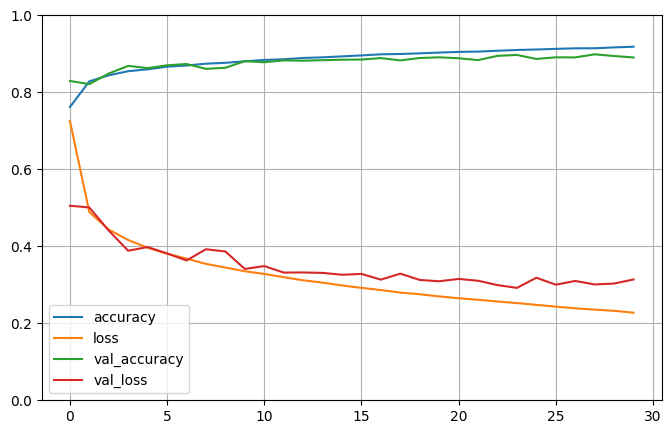

In [94]:
 import pandas as pd
 import matplotlib.pyplot as plt
 pd.DataFrame(history.history).plot(figsize=(8, 5))
 plt.grid(True)
 plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
 plt.show()

In [95]:
 model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8472 - loss: 62.4780


[65.5239486694336, 0.8434000015258789]

In [96]:
X_new = X_test[:3]



In [97]:
y_proba = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [99]:
import numpy as np

# Get the class probabilities
y_proba = model.predict(X_new)

# Get the class with the highest probability for each instance
y_pred = np.argmax(y_proba, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [100]:
y_pred

array([9, 2, 1])

In [101]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')